In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
temp = data.sf_temps()

# #1 - San Fran Temps

In [18]:
sf_temp.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [19]:
sf_temp = temp.set_index('date')
sf_temp

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Text(0, 0.5, 'Temperature')

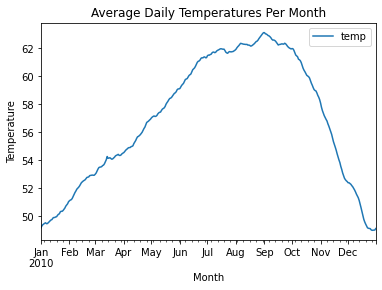

In [29]:
sf_temp.resample('D').mean().plot()
plt.title('Average Daily Temperatures Per Month')
plt.xlabel('Month')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

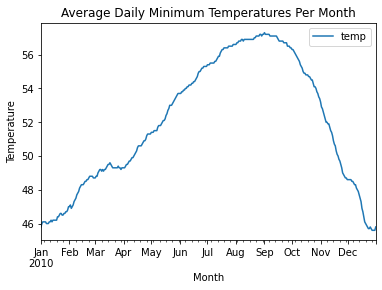

In [30]:
sf_temp.resample('D').min().plot()
plt.title('Average Daily Minimum Temperatures Per Month')
plt.xlabel('Month')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

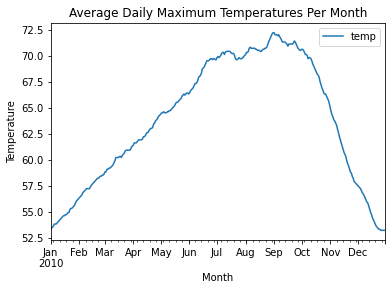

In [31]:
sf_temp.resample('D').max().plot()
plt.title('Average Daily Maximum Temperatures Per Month')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [41]:
print('The coldest month is ', sf_temp.resample('M').mean().index.min())

The coldest month is  2010-01-31 00:00:00


In [42]:
print('The month with the highest average temp is', sf_temp.resample('M').mean().index.max())

The month with the highest average temp is 2010-12-31 00:00:00


In [43]:
min_max = sf_temp.resample('D').agg(['min','max'])

In [44]:
min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [45]:
min_max['variance'] = min_max[('temp', 'max')] - min_max[('temp', 'min')]

In [46]:
min_max.head()

temp       variance
             min   max         
date                           
2010-01-01  45.8  53.3      7.5
2010-01-02  46.0  53.4      7.4
2010-01-03  46.1  53.5      7.4
2010-01-04  46.1  53.6      7.5
2010-01-05  46.1  53.8      7.7

In [49]:
min_max.variance.resample('M').mean().index.max()

Timestamp('2010-12-31 00:00:00', freq='M')

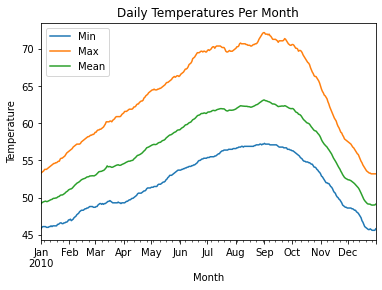

In [51]:
sf_temp.resample('D').agg(['min','max','mean']).plot()
plt.title('Daily Temperatures Per Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(('Min','Max','Mean'))

# #2 - Seattle Weather

In [54]:
sea_weather = data.seattle_weather()

In [55]:
sea_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [56]:
sea_weather = sea_weather.set_index('date')
sea_weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [150]:
sea_weather.precipitation.resample('M').sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

Text(0, 0.5, 'Precipitation')

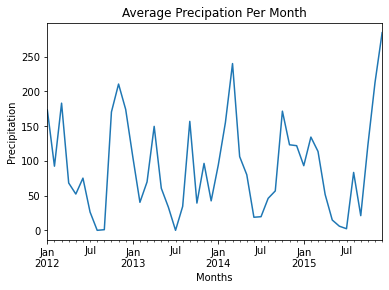

In [151]:
sea_weather.precipitation.resample('M').sum().plot()
plt.title('Average Precipation Per Month')
plt.xlabel('Months')
plt.ylabel('Precipitation')

Text(0, 0.5, 'Wind')

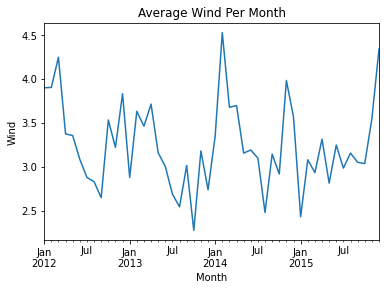

In [92]:
sea_weather.wind.resample('M').mean().plot()
plt.title('Average Wind Per Month')
plt.xlabel('Month')
plt.ylabel('Wind')

In [105]:
sea_weather.wind.resample('M').mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [142]:
sunny = sea_weather.weather == 'sun'8
sea_weather.weather[sunny].resample('Y').count().sort_values(ascending=False).head(1)

date
2014-12-31    211
Name: weather, dtype: int64

In [143]:
sea_weather.precipitation.resample('M').sum().sort_values(ascending=False).head(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

In [147]:
non_zero = sea_weather.precipitation > 0
sea_weather.precipitation[non_zero].resample('M').count().sort_values(ascending=False).head(1)

date
2012-12-31    27
Name: precipitation, dtype: int64

In [148]:
flights = data.flights_20k()

In [149]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
